In [4]:
from transformers import pipeline

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
classifier = pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment')

text = 'how long does it stay spinning? if it was accelerated faster would it maintain its speed?\n'

res = classifier(text)
print(res)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
Device set to use 0


[{'label': 'LABEL_1', 'score': 0.9035197496414185}]


In [11]:
model = classifier.model
print(model.config.id2label)

{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2'}


In [6]:
comments = []
with open('../Fetched_Data/comment.txt','r', encoding='utf-8') as file:
        for line in file:
                comments.append(line)

In [7]:
res = classifier(comments)
print(res)

[{'label': 'LABEL_1', 'score': 0.5933271050453186}, {'label': 'LABEL_1', 'score': 0.9035197496414185}, {'label': 'LABEL_1', 'score': 0.5811142325401306}, {'label': 'LABEL_0', 'score': 0.6506471037864685}, {'label': 'LABEL_1', 'score': 0.8881536722183228}, {'label': 'LABEL_1', 'score': 0.7373375296592712}, {'label': 'LABEL_1', 'score': 0.843970775604248}, {'label': 'LABEL_2', 'score': 0.6273351907730103}, {'label': 'LABEL_1', 'score': 0.740587592124939}, {'label': 'LABEL_1', 'score': 0.7296460866928101}, {'label': 'LABEL_2', 'score': 0.9016661643981934}, {'label': 'LABEL_1', 'score': 0.709412693977356}, {'label': 'LABEL_2', 'score': 0.970238208770752}, {'label': 'LABEL_2', 'score': 0.5612967610359192}, {'label': 'LABEL_2', 'score': 0.746158242225647}, {'label': 'LABEL_1', 'score': 0.8951327800750732}, {'label': 'LABEL_2', 'score': 0.4981320798397064}, {'label': 'LABEL_1', 'score': 0.7486150860786438}, {'label': 'LABEL_2', 'score': 0.9872762560844421}, {'label': 'LABEL_1', 'score': 0.664

In [12]:
label_map = {
    'LABEL_0':'Negative',
    'LABEL_1':'Neutral',
    'LABEL_2':'Positive'
}

In [17]:
labels = [r['label'] for r in res]
neutral = labels.count('LABEL_1')
positive = labels.count('LABEL_2')
negative = labels.count('LABEL_0')

print('Positive: ',positive)
print('Neutral: ',neutral)
print('Negative: ',negative)


Positive:  27
Neutral:  64
Negative:  11


In [18]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

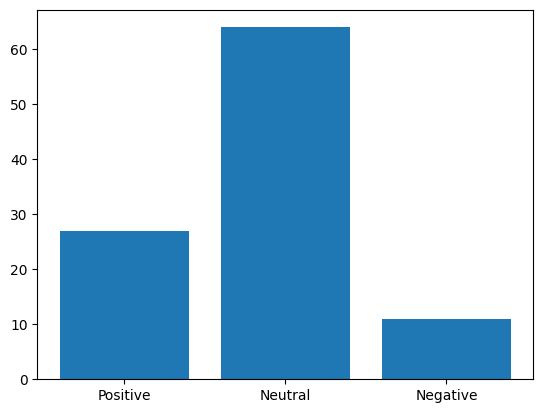

In [19]:
plt.bar(['Positive','Neutral','Negative'],[positive,neutral,negative])

([<matplotlib.patches.Wedge at 0x2488bb31ed0>,
 [Text(0.741065169248085, 0.8129098442799837, 'Positive'),
  Text(-0.9691133902766284, -0.5204029561662188, 'Neutral'),
  Text(1.0374698435390588, -0.36559037698911206, 'Negative')],
 [Text(0.4042173650444099, 0.4434053696072638, '26.5%'),
  Text(-0.5286073037872517, -0.2838561579088466, '62.7%'),
  Text(0.5658926419303957, -0.199412932903152, '10.8%')])

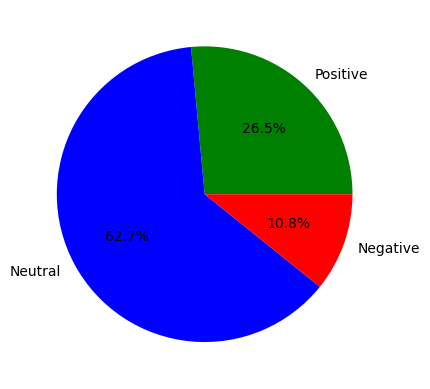

In [24]:
plt.pie([positive,neutral,negative],labels=['Positive','Neutral','Negative'],colors=['green','blue','red'],autopct='%1.1f%%')